[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0.00534999, Tstat=21.7751


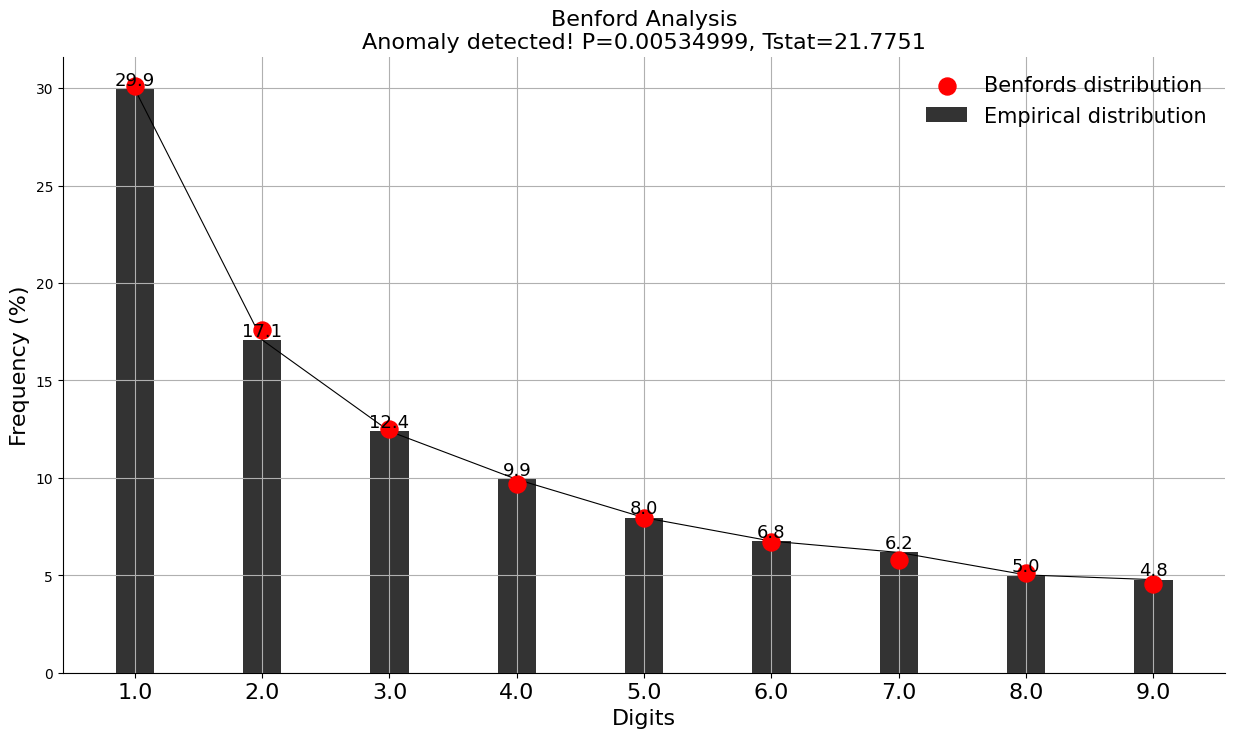

{'P': 0.0053499912170595154, 't': 21.77509485666655, 'P_significant': True, 'percentage_emp': array([[ 1.        , 29.9386866 ],
       [ 2.        , 17.07631904],
       [ 3.        , 12.38907116],
       [ 4.        ,  9.92040015],
       [ 5.        ,  7.95729576],
       [ 6.        ,  6.75254128],
       [ 7.        ,  6.17167751],
       [ 8.        ,  5.01801753],
       [ 9.        ,  4.77599096]])}


In [42]:
from benfordslaw import benfordslaw
import pandas as pd
import numpy as np

# Import Data
file_path = '/Users/mdshamiulislam/Downloads/US_County_Level_Presidential_Results_08-16.csv'
df = pd.read_csv(file_path)

# Data Cleaing
df = df.drop(columns = ['fips_code','county']).astype(int).values.flatten()
df_abosolutevalue = np.abs(df)

# Initialize the benford lsw

bl = benfordslaw(alpha=0.05)

result = bl.fit(df_abosolutevalue)

bl.plot(title='Benford Analysis')
print(result)



array([19064,  9974,  8763, ...,   149,  1127,    52])

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

def extract_first_digits(data):
    """
    Extracts the first significant digit from an array of positive integers.
    
    Parameters:
        data (array-like): Array of positive integers.

    Returns:
        first_digits (ndarray): Array of first digits.
    """
    data = np.abs(data)  # Ensure all values are positive
    first_digits = np.array([int(str(num)[0]) for num in data if num > 0])
    return first_digits

def benford_distribution():
    """
    Calculates the expected Benford distribution (log10(1 + 1/d)).
    
    Returns:
        ndarray: Array of probabilities for digits 1-9.
    """
    return np.log10(1 + 1 / np.arange(1, 10))

def empirical_distribution(first_digits):
    """
    Calculates the empirical distribution of the first digits.
    
    Parameters:
        first_digits (ndarray): Array of first digits.

    Returns:
        ndarray: Array of probabilities for digits 1-9.
    """
    counts = np.array([np.sum(first_digits == d) for d in range(1, 10)])
    return counts / counts.sum()

def benford_law(data):
    """
    Main function to calculate and plot the Benford and empirical distributions, 
    and compute the p-value using a chi-square goodness-of-fit test.

    Parameters:
        data (array-like): Array of positive integers.

    Returns:
        None
    """
    # Extract first digits from the data
    first_digits = extract_first_digits(data)

    # Calculate Benford and empirical distributions
    benford_probs = benford_distribution()
    empirical_probs = empirical_distribution(first_digits)

    # Perform Chi-Square test for goodness-of-fit
    observed = np.array([np.sum(first_digits == d) for d in range(1, 10)])
    expected = benford_probs * observed.sum()
    chi2_stat, p_value = chisquare(observed, f_exp=expected)

    # Print results
    print(f"Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")

    # Plot the distributions
    plot_distributions(benford_probs, empirical_probs)

def plot_distributions(benford_probs, empirical_probs):
    """
    Plots the Benford distribution vs the empirical distribution.

    Parameters:
        benford_probs (ndarray): Theoretical Benford probabilities.
        empirical_probs (ndarray): Empirical probabilities from the data.

    Returns:
        None
    """
    digits = np.arange(1, 10)

    plt.figure(figsize=(10, 6))
    plt.bar(digits - 0.2, benford_probs, width=0.4, label='Benford', align='center')
    plt.bar(digits + 0.2, empirical_probs, width=0.4, label='Empirical', align='center')

    plt.xlabel('First Digit', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    plt.title('Benford vs Empirical Distribution', fontsize=16)
    plt.xticks(digits)
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load the dataset
    file_path = "/Users/mdshamiulislam/Downloads/US_County_Level_Presidential_Results_08-16.csv"
    df = pd.read_csv(file_path)

    # Prepare the data by dropping unnecessary columns and flattening the values
    data = df.drop(columns=['fips_code', 'county']).astype(int).values.flatten()

    # Call the Benford_Law function on the prepared data
    benford_law(data)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/US_County_Level_Presidential_Results_08-16.csv'